# CAR PRICE PREDICTION WITH MACHINE LEARNING

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

In [10]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [11]:
# Load the dataset
data = pd.read_csv("C:/Users/Dell/Desktop/Internship/Oasis_Infobyte/DS/car data.csv")


In [12]:
# Display the first few rows of the dataset
print(data.head())

# Data Preprocessing
# Check for missing values
print(data.isnull().sum())

# Handle missing values if any
data.fillna(method='ffill', inplace=True)

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [13]:
# Encode categorical features
categorical_features = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']


In [14]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [15]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [16]:
# Split data into features and target variable
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [18]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.5954803278688526
Mean Squared Error: 0.7710541483606554
R^2 Score: 0.9665276933745053


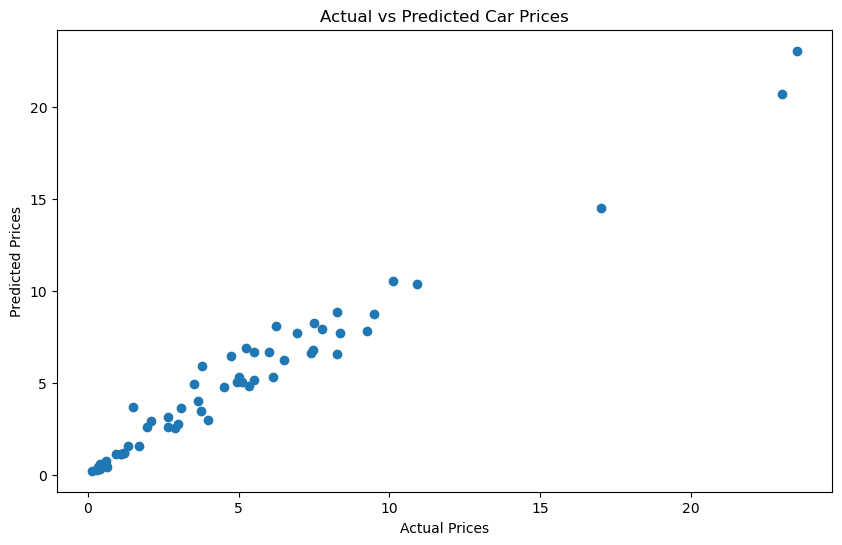

In [19]:
# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()
